# Assignment 2: Enhancement and Filtering
## SCC0251.2020.1 - Image Processing
### Prof. Dr. Moacir Ponti
### 10284952 - Vitor Gratiere Torres

In [1]:
# Imports
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# Formulae described on assignment's pdf
def scale(image, c=0, d=255):
    a = np.min(image)
    b = np.max(image)
    return (image-a)*((d-c)/(b-a))+c


def t1(image):
    def g(x, s):  # Gaussian kernel
        return np.exp((-(x**2))/(2*(s**2)))/(2*np.pi*(s**2))

    def e(x, y):  # Eclidean distance
        return np.sqrt(x**2 + y**2)

    n = int(input())
    ss = float(input())
    sr = float(input())

    wp = 0
    # padding lenght
    pad = int(np.floor(n/2))

    # original image dimensions
    ix, iy = np.shape(image)
    # final image
    ans = np.array([[0.0 for y in range(0, iy)] for x in range(0, ix)])

    # range to create spatial gaussian component
    nrng = range(int(np.ceil(-n/2)), int(np.ceil(n/2)))
    # spatial gaussian component
    sgc = np.array([[g(e(x, y), ss) for y in nrng] for x in nrng])

    image = np.pad(image, pad).astype(np.float)
    for i in range(pad, ix+1):
        for j in range(pad, iy+1):
            # range gaussian component for each neighborhood
            rgc = np.array([[g(image[x, y]-image[i, j], sr)
                             for y in range(j-pad, j+pad+1)]
                            for x in range(i-pad, i+pad+1)])
            wi = rgc * sgc
            wp = wp + wi
            ans[i-pad, j-pad] = np.sum(np.multiply(image[i-pad:i+pad+1, j-pad:j+pad+1], wi))
    return scale(ans/np.sum(wp))


def t2(image):
    c = float(input())
    if(c > 1):
        raise ValueError("C must be <= 1")
    k = int(input())
    if(k not in [1, 2]):
        raise ValueError("K must be 1 or 2")


def t3(image):
    row = float(input())
    col = float(input())

# t1(r)

In [3]:
# Root Squared Error function
def rse(r, m):
    return np.sqrt(np.sum((m.astype(np.float)-r.astype(np.float))**2))

In [4]:
# Inputs, following assignment's pdf requested sequence
r = imageio.imread(str("/home/ava/documents/classes/SCC0251_DIP/a02/images/camera.png").rstrip()).astype(np.uint8)
m = int(1)
s = (False, True)[int(0)]

In [5]:
# Dictionary for functions
t = {1: t1, 2: t2, 3: t3}

# Appling 'm' transformation to original image 'r'
# Storing back on 'm'
m = t[m](r)

# Calculating RSE and printing
print("{:.4f}".format(rse(r, m)))

# Saving
if s:
    imageio.imwrite("images/output_img.png", m)

3
150
100
4081.7458


(-0.5, 149.5, 149.5, -0.5)

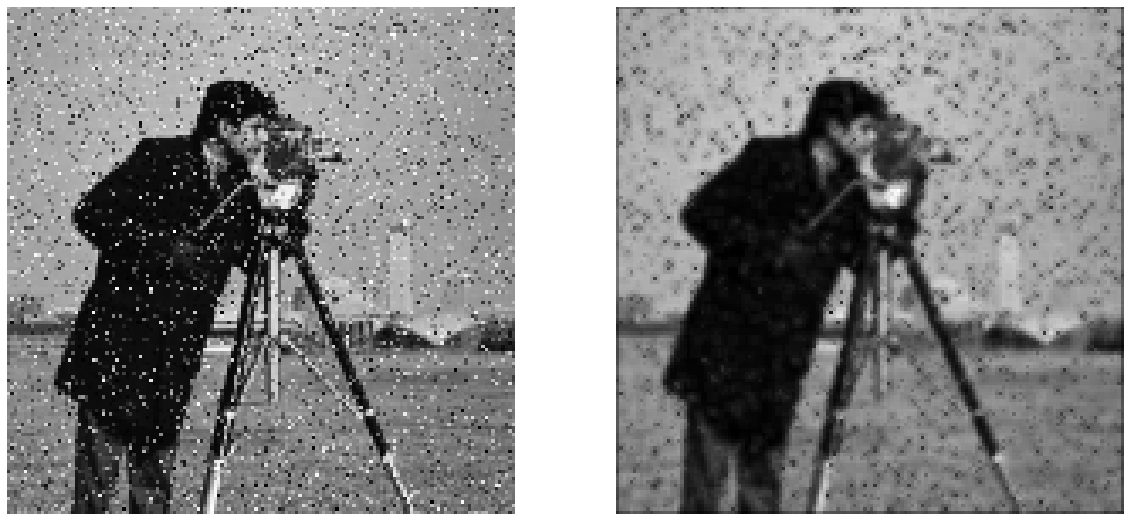

In [6]:
# Plotting
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')

plt.subplot(122)
plt.imshow(m.astype(np.uint8), cmap="gray")
plt.axis('off')